<a href="https://colab.research.google.com/github/samyxdev/MyColabNotebooks/blob/main/DA_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorlayer

     |████████████████████████████████| 368kB 4.2MB/s 
     |████████████████████████████████| 3.3MB 7.7MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
  Found existing installation: progressbar2 3.38.0
    Uninstalling progressbar2-3.38.0:
      Successfully uninstalled progressbar2-3.38.0


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorlayer as tl
import cv2

import progressbar as pb

from random import randrange, random

from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Version : {}, eagerly : {}".format(tf.__version__, tf.executing_eagerly()))

Version : 2.5.0, eagerly : True


In [ ]:
((x_train, y_train), (x_test, y_test)) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0 # Norm

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Récupération, normalisation et reshaping des images
SHAPE = (28, 28, 1)

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters=34,
                                                            kernel_size=(3, 3),
                                                            activation=tf.nn.relu,
                                                            input_shape=SHAPE),
                                    tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu),
                                    tf.keras.layers.Conv2D(30, (3, 3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(40, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(0.12),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()

model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 34)        340       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 30)        8670      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 30)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 30)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3630)              0         
_________________________________________________________________
dense (Dense)                (None, 40)                1

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.15, rotation_range=15, validation_split=0.2)
train_gen = datagen.flow(x_train, y_train, subset='training')
valid_gen = datagen.flow(x_train, y_train, subset='validation')

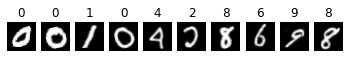

In [ ]:
# Vérifier la sortie augmentée sur le premier batch
train_test_batch = train_gen.next()
for i in range(10):
  plt.subplot(1, 10, i+1)

  data_tuple = np.squeeze(train_test_batch[0][i])

  plt.imshow(data_tuple, cmap='gray')
  plt.title(train_test_batch[1][i])
  plt.axis('off')

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.15, rotation_range=15, validation_split=0.2)
train_gen = datagen.flow(x_train, y_train, subset='training')
valid_gen = datagen.flow(x_train, y_train, subset='validation')

In [ ]:
history = model.fit(*train_gen, batch_size=32, validation_data=valid_gen, validation_batch_size=32, verbose=2, epochs=10)




